In [ ]:
cd "/content/drive/My Drive/audioToLyrics"

/content/drive/My Drive/audioToLyrics


In [ ]:
from audiotolyrics.preprocessing.datacontainer import audioContainer, textContainer
from audiotolyrics.textgenmodel.atlmodel import  audioFeatureExtractor
import librosa, librosa.display
import os 
import numpy as np
import pickle as pkl

In [ ]:
paths_audio_text = []
for genre in ["rap", "country"]:
  paths_audio_text.append(f"./audioToLyrics_{genre}")

In [ ]:
# with open("./datasets/audicontainer", "rb") as f:
#   songs = pkl.load(f)

# with open("./datasets/audicontainer.pkl", "rb") as f: #mel
#   songs = pkl.load(f)
# with open("./datasets/textcontainer.pkl", "rb") as f:
#   text = pkl.load(f)

In [ ]:
songs = audioContainer(paths_audio_text, sr = 16000, limit=None, song_duration=10, use_log_spectrogram=True) # 4400 # CD Quality:44100

Number of files in folder (lyrics+ tracks): 138
Number of audio tracks with lyrics: 61
Number of files in folder (lyrics+ tracks): 128
Number of audio tracks with lyrics: 61


In [ ]:
songs.paths

['./audioToLyrics_country/Morgan Wallen - Up Down ft. Florida Georgia Line (Official Video)-77qc4ZtufzM.mp3',
 './audioToLyrics_rap/Drake & Lil Baby - Yes Indeed (Lyrics)-AbEHRrq7xwU.mp3',
 './audioToLyrics_rap/Moneybagg Yo - Said Sum (Remix_Audio) ft. City Girls, DaBaby-d8RfqDmU3nE.mp3',
 './audioToLyrics_country/Diplo Presents - Thomas Wesley - Dance With Me (ft. Thomas Rhett & Young Thug) (Music Video)-1dJFk3PP6MY.mp3',
 './audioToLyrics_country/Florida Georgia Line - This Is How We Roll ft. Luke Bryan-CbxuXq_981s.mp3',
 './audioToLyrics_country/Diplo - Heartless (Lyrics) ft. Morgan Wallen-p-AKeEadG2Y.mp3',
 './audioToLyrics_country/Dan + Shay - Speechless (Wedding Video)-7UoP9ABJXGE.mp3',
 './audioToLyrics_country/Morgan Wallen - The Way I Talk (Official Video)-pbKM-6k2cHg.mp3',
 './audioToLyrics_rap/Work Out- J. Cole.mp3',
 './audioToLyrics_country/Dan + Shay - Take Me Home For Christmas (Official Music Video)-4QJKhKNWy5o.mp3',
 './audioToLyrics_rap/DaBaby - VIBEZ (Official Music 

In [ ]:
songs.load_songs()

In [ ]:
# # songs.save("./datasets/audioContainer.pkl")
# import pickle as pkl
# with open("./datasets/audicontainer.pkl", "wb") as f:
#   pkl.dump(songs, f)

In [ ]:
text = textContainer(paths_audio_text, songs, text_limit_per_song=None)

In [ ]:
input_output_text, input_audio_dict= text.run_datapipeline()
first_key = [key for i, key in enumerate(input_audio_dict.keys()) if i <1]

Streaming output truncated to the last 5000 lines.
Lyric count: 36
startseq snuck xanny on the plane in her fuckin lipstick endseq
Lyric count: 37
startseq she look at me and laugh give fuck what think endseq
Lyric count: 38
startseq and she batshit crazy but like her like this yeah endseq
Lyric count: 39
startseq shawty so bad man shawty so cold endseq
Lyric count: 40
startseq wanna go out twentyfive years old endseq
Lyric count: 41
startseq met her in the club they were playin psycho endseq
Lyric count: 42
startseq now we match aps and they all rosegold endseq
Lyric count: 43
startseq and we both can agree endseq
Lyric count: 44
startseq ooh she wilder than me endseq
Lyric count: 45
startseq chorus ty dolla ign endseq
Lyric count: 46
startseq yeah tell me who tryna who tryna go endseq
Lyric count: 47
startseq who gon drop it down like theres money on the floor endseq
Lyric count: 48
startseq who tryna who tryna bust it for the dollars endseq
Lyric count: 49
startseq who tryna freak b

In [ ]:
# with open("./datasets/textcontainer.pkl", "wb") as f:
#   pkl.dump(text, f)

In [ ]:
input_audio_dict["Blake Shelton - God's Country (Official Music Video)-ZEWGyyLiqY4.mp3"].shape

(64, 1001)

In [ ]:
text.vocab_length

5690

In [ ]:
text.max_len

37

In [ ]:
input_text

array([[  0,   0,   0, ...,   0,   0,   1],
       [  0,   0,   0, ...,   0,   1,  52],
       [  0,   0,   0, ...,   1,  52, 330],
       ...,
       [  0,   0,   0, ..., 770,   3, 771],
       [  0,   0,   0, ...,   3, 771, 329],
       [  0,   0,   0, ..., 771, 329, 203]], dtype=int32)

In [ ]:
np.argmax(output_text,axis=1)

array([ 52, 330,  48, ..., 329, 203,   2])

In [ ]:
# Setting some hyperparameters
ks_list = [3, 3, 3, 3]
filter_list = [64, 128, 256, 512]
stride_list = [1,1,1, 1]
laten_dim = 256
embedding_dim = 128
use_spectrogram = True

In [ ]:
model = audioFeatureExtractor(text.vocab_length, filter_list, ks_list, stride_list, embedding_size=embedding_dim, 
                              latent_dim=laten_dim, max_len= text.max_len, input_channel = input_audio_dict[first_key[0]].shape[0], #input_audio.shape[1],
                             seq_len = input_audio_dict[first_key[0]].shape[1], )#input_audio.shape[-1])

In [ ]:
model.traintextgen(input_audio_dict, input_output_text, epochs=60, cuda=True, bsize=10, use_spectrogram=use_spectrogram, learning_rate=0.0001)

  0%|          | 0/122 [00:00<?, ?it/s]

Starting model training for 60 epochs


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:146: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

  0%|          | 0/122 [00:00<?, ?it/s]

Epoch #1, loss=6.379651928181813



  0%|          | 0/122 [00:00<?, ?it/s]

Epoch #11, loss=4.355068079106866



  0%|          | 0/122 [00:00<?, ?it/s]

Epoch #21, loss=3.4258031650998464



  0%|          | 0/122 [00:00<?, ?it/s]

Epoch #31, loss=2.447725673172828



  0%|          | 0/122 [00:00<?, ?it/s]

Epoch #41, loss=1.7280177453836034



  0%|          | 0/122 [00:00<?, ?it/s]

Epoch #51, loss=1.2837970404112544



 90%|█████████ | 110/122 [01:44<00:08,  1.38it/s]

In [19]:
# import pickle as pkl
# with open("./datasets/model_new.pt", "wb") as f:
#   pkl.dump(model, f)

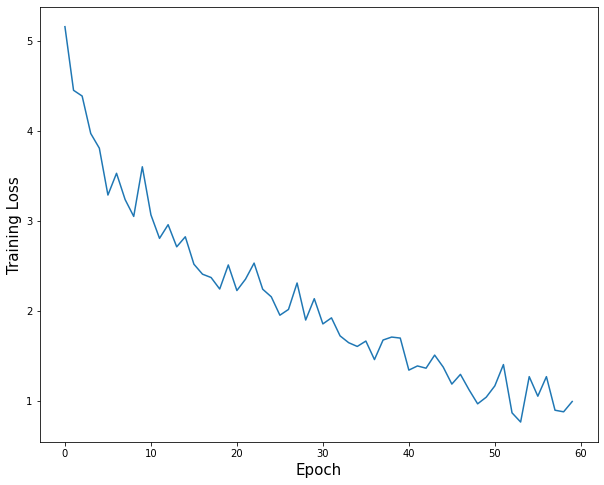

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.plot(model.hist)
plt.xlabel("Epoch", fontsize=15)
plt.ylabel("Training Loss", fontsize=15) 
plt.show()

In [31]:
myinput = input_audio_dict['DaBaby - VIBEZ (Official Music Video)-U2JyeciEwSI.mp3'][None, :, :]
model.spitbars(text.tokenizer, torch.tensor(myinput).type(torch.cuda.FloatTensor), )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:146: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


'startseq just told my dick baby go just are make that neck neck my neck endseq'

In [206]:
rap_word = "startseq"
for _ in range(30):
  gen_lyrics  =model.spitbars(text.tokenizer, torch.tensor(input_audio_dict['Drake - Toosie Slide (Official Music Video)-xWggTb45brM.mp3'][None, :, :]).type(torch.cuda.FloatTensor), in_text= rap_word )
  rap_word = gen_lyrics.split(" ")[-2]
  print(gen_lyrics)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:146: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


startseq left foot up right foot slide endseq
slide see im dance here up either where endseq
where ima show you you endseq
you chorus endseq
chorus endseq
chorus endseq
chorus endseq
chorus endseq
chorus endseq
chorus endseq
chorus endseq
chorus endseq
chorus endseq
chorus crossbody you how with it it where you you no endseq
no black show you know with passion endseq
passion left on the jacket woah endseq
woah thats dance in the block yeah yeah endseq
yeah it leather foot the truthll love yeah endseq
yeah its thriller this how it be endseq
be black left with no either doubletime with me bad endseq
bad black cant satisfaction no afford time with for your summertime shit endseq
shit black dance that sayin either opps the opps woah endseq
woah left foot woah of or slide endseq
slide black dance off with michael be endseq
be black left that sayin love the stop for love yeah endseq
yeah left leather im opps endseq
opps it left you satisfaction passion endseq
passion so show you how for ends

In [32]:
word = "girl"
model.spitbars(text.tokenizer, torch.tensor(myinput).type(torch.cuda.FloatTensor), in_text=word )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:146: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


'girl we keep the stick and im firin no like so roof endseq'

In [33]:
myinput = input_audio_dict["Luke Combs - Lovin' On You (Official Video)-G4JKLH929B0.mp3"][None, :, :]
model.spitbars(text.tokenizer, torch.tensor(myinput).type(torch.cuda.FloatTensor), )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:146: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


'startseq im junkie when like lovin you cant im endseq'

In [175]:
country_word = "startseq"
for _ in range(30):
  gen_lyrics  =model.spitbars(text.tokenizer, torch.tensor(input_audio_dict["Luke Combs - Lovin' On You (Official Video)-G4JKLH929B0.mp3"][None, :, :]).type(torch.cuda.FloatTensor), in_text= country_word )
  print(gen_lyrics)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:146: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


startseq im in your midnight as endseq
startseq im in your midnight as endseq
startseq im in your midnight lovin endseq
startseq im in love and lovin on you endseq
startseq im in your midnight lovin endseq
startseq im in love and lovin on you endseq
startseq im in love and lovin on you endseq
startseq im in love with lovin lil hit endseq
startseq im in love with just know im hit you you like endseq
startseq im in love on lovin endseq
startseq im in love with but swear im just em me endseq
startseq im in love and know on em endseq
startseq im junkie right you im cant only in the way endseq
startseq im in love and lovin on you endseq
startseq im in love with lovin on you endseq
startseq im in love with lovin on you endseq
startseq im in love with lovin on you endseq
startseq im in your midnight lovin endseq
startseq im in your midnight lovin endseq
startseq im junkie for me lovin youre you you endseq
startseq im junkie right you money you hit me endseq
startseq im in love with lovin on y

In [35]:
model.spitbars(text.tokenizer, torch.tensor(myinput).type(torch.cuda.FloatTensor), in_text=word )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:146: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


'girl im in your broken feel endseq'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:146: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


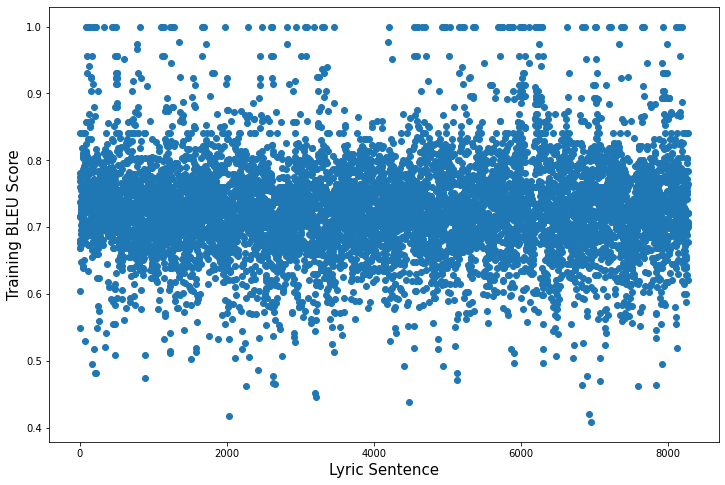

In [137]:
from nltk.translate.bleu_score import sentence_bleu
score = []
for key in text.cleaned_lyrics.keys():
  all_lyrics = text.cleaned_lyrics[key]
  cleaned_tmp_lyrics = [tmp.replace("startseq", "").replace("endseq","") for tmp in all_lyrics]
  for i, clean_tmp_lyric in enumerate(cleaned_tmp_lyrics):
    myaudio_tmp = myinput = input_audio_dict[key][None, :, :]
    pred = model.spitbars(text.tokenizer, torch.tensor(myaudio_tmp).type(torch.cuda.FloatTensor), in_text=clean_tmp_lyric.split(" ")[1])
    pred = pred.replace("startseq", "").replace("endseq","")
    score.append(sentence_bleu(clean_tmp_lyric, pred))

plt.figure(figsize=(12,8))
plt.scatter(range(len(score)),score)
plt.xlabel("Lyric Sentence", fontsize=15)
plt.ylabel("Training BLEU Score", fontsize=15) 
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:146: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


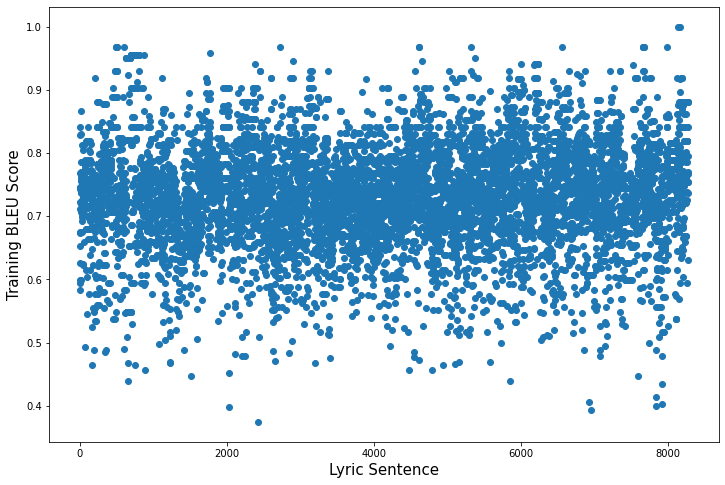

In [157]:
from nltk.translate.bleu_score import sentence_bleu
score = []
for key in text.cleaned_lyrics.keys():
  all_lyrics = text.cleaned_lyrics[key]
  cleaned_tmp_lyrics = [tmp.replace("startseq", "").replace("endseq","") for tmp in all_lyrics]
  for i, clean_tmp_lyric in enumerate(cleaned_tmp_lyrics):
    myaudio_tmp = myinput = input_audio_dict[key][None, :, :]
    pred = model.spitbars(text.tokenizer, torch.tensor(myaudio_tmp).type(torch.cuda.FloatTensor))
    pred = pred.replace("startseq", "").replace("endseq","")
    score.append(sentence_bleu(clean_tmp_lyric, pred))

plt.figure(figsize=(12,8))
plt.scatter(range(len(score)),score)
plt.xlabel("Lyric Sentence", fontsize=15)
plt.ylabel("Training BLEU Score", fontsize=15) 
plt.show()

In [135]:
 model.spitbars(text.tokenizer, torch.tensor(myaudio_tmp).type(torch.cuda.FloatTensor), in_text=clean_tmp_lyric.split(" ")[1])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:146: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


'all she dont youre love from herself endseq'

In [38]:
test_paths = ["./audioToLyrics_rap/test", "./audioToLyrics_country/test"]
songs2 = audioContainer(test_paths, sr = 16000, limit=2, song_duration=10, use_log_spectrogram=True) # 4400 # CD Quality:44100
songs2.load_songs()
songs2.paths

Number of files in folder (lyrics+ tracks): 26
Number of audio tracks with lyrics: 13
Number of files in folder (lyrics+ tracks): 26
Number of audio tracks with lyrics: 13


['./audioToLyrics_country/test/Florida Georgia Line - H.O.L.Y.-zXDAYlhdkyg.mp3',
 './audioToLyrics_rap/test/Megan Thee Stallion - Big Ole Freak [Official Video]-oBYf6gpVvRA.mp3']

In [39]:
text_test = textContainer(test_paths, songs2, text_limit_per_song=None)
_, input_audio_dict_test = text_test.run_datapipeline()

Associating lyrics and audio
Cleaning lyrics
Inserting start and end token
Building vocabulary
Creating tokens
Creation audio dictionary
Format data for input-output
Handling file Florida Georgia Line - H.O.L.Y.-zXDAYlhdkyg.mp3
Lyric count: 1
startseq when the sun had left and the winter came endseq
Lyric count: 2
startseq and the sky fall to only bring the rain endseq
Lyric count: 3
startseq sat in darkness endseq
Lyric count: 4
startseq all brokenhearted endseq
Lyric count: 5
startseq couldnt find day didnt feel alone endseq
Lyric count: 6
startseq never meant to cry started losin hope endseq
Lyric count: 7
startseq but somehow baby endseq
Lyric count: 8
startseq you broke through and saved me endseq
Lyric count: 9
startseq prechorus endseq
Lyric count: 10
startseq youre an angel tell me youre never leavin endseq
Lyric count: 11
startseq cause youre the first thing know can believe in endseq
Lyric count: 12
startseq chorus endseq
Lyric count: 13
startseq youre holy holy endseq
Lyric 

In [45]:
test_word = "girl"

In [57]:
myinput = input_audio_dict_test['Megan Thee Stallion - Big Ole Freak [Official Video]-oBYf6gpVvRA.mp3'][None, :, :]
model.spitbars(text.tokenizer, torch.tensor(myinput).type(torch.cuda.FloatTensor), in_text= test_word,)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:146: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


'girl im gonna talk them hot endseq'

In [60]:
myinput = input_audio_dict_test["Florida Georgia Line - H.O.L.Y.-zXDAYlhdkyg.mp3"][None, :, :]
model.spitbars(text.tokenizer, torch.tensor(myinput).type(torch.cuda.FloatTensor), in_text= test_word )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:146: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


'girl hit her dream and over he tell like your man endseq'

In [62]:
# Rap Predictions
rap_test_path =  [test_paths[0]]
rap = audioContainer(rap_test_path, sr = 16000, song_duration=10, use_log_spectrogram=True) # 4400 # CD Quality:44100
rap.load_songs()

Number of files in folder (lyrics+ tracks): 26
Number of audio tracks with lyrics: 13


In [64]:
rap_text = textContainer(rap_test_path, rap, text_limit_per_song=None)
_, rap_audio = rap_text.run_datapipeline()

Associating lyrics and audio
Cleaning lyrics
Inserting start and end token
Building vocabulary
Creating tokens
Creation audio dictionary
Format data for input-output
Handling file Tyla Yaweh - Stuntin' On You (Official Music Video) ft. DaBaby-aXRjhs7Q5ag.mp3
Lyric count: 1
startseq when ride out endseq
Lyric count: 2
startseq right now sound hitmaka blue hunnids got em comin down the pole when buy it out endseq
Lyric count: 3
startseq sound endseq
Lyric count: 4
startseq chorus tyla yaweh endseq
Lyric count: 5
startseq ohoh stuntin on you endseq
Lyric count: 6
startseq big spender yeah hundred on my wrist yeah endseq
Lyric count: 7
startseq ohoh stuntin on you endseq
Lyric count: 8
startseq big tipper yeah hundred on my bitch yeah endseq
Lyric count: 9
startseq ohoh stuntin on you endseq
Lyric count: 10
startseq big spender yeah hundred on my wrist yeah endseq
Lyric count: 11
startseq ohoh stuntin on you endseq
Lyric count: 12
startseq big tipper yeah hundred on my bitch yeah endseq
Ly

In [138]:
rap_word = "startseq"
rap_gen_lyrics = []
for key in rap_audio.keys():
  tmp = rap_audio[key][None, :, :]
  gen_lyrics =model.spitbars(text.tokenizer, torch.tensor(tmp).type(torch.cuda.FloatTensor), in_text= rap_word )
  print(gen_lyrics)
  rap_gen_lyrics.append(gen_lyrics)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:146: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


startseq outro endseq
startseq outro endseq
startseq im gone of love with love endseq
startseq outro endseq
startseq outro megan malone endseq
startseq outro florida georgia line endseq
startseq bridge endseq
startseq outro endseq
startseq im gon play keep cant make well came show both right endseq
startseq bridge endseq
startseq you know you know to you you you it you it it endseq
startseq outro travis scott endseq
startseq outro endseq


In [139]:
rap_word = "girl"
for key in rap_audio.keys():
  tmp = rap_audio[key][None, :, :]
  gen_lyrics =model.spitbars(text.tokenizer, torch.tensor(tmp).type(torch.cuda.FloatTensor), in_text= rap_word )
  print(gen_lyrics)
  rap_gen_lyrics.append(gen_lyrics)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:146: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


girl girl theres car of city to good no endseq
girl im gonna love to was made me in you deep endseq
girl im goin for hard with be for be you it you this im im that that you shake endseq
girl cant really thing as what youre truck endseq
girl outro endseq
girl outro by minaj by line by endseq
girl and brought the way we from that this aint was endseq
girl im in the way and im know in the my god endseq
girl im gon leave into too much endseq
girl id thing of ride is you know you do endseq
girl you know it the know and you you know it you endseq
girl keep catch open actin yeah it endseq
girl outro thomas rhett he dont love endseq


In [140]:
rap_word = "world"
for key in rap_audio.keys():
  tmp = rap_audio[key][None, :, :]
  gen_lyrics =model.spitbars(text.tokenizer, torch.tensor(tmp).type(torch.cuda.FloatTensor), in_text= rap_word )
  print(gen_lyrics)
  rap_gen_lyrics.append(gen_lyrics)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:146: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


world thinkin gonna bitches reason of these gotta side endseq
world outro lil nothin with line endseq
world im only love from my motherfuckin felt endseq
world cant thought when to man em in endseq
world outro megan malone with no endseq
world outro by thug til line quavo endseq
world thats time from its back to let to endseq
world why think we got me in the dirt with the heart endseq
world im only never take sure feel ride endseq
world yeah just really the see the dance to the mind endseq
world im dont know it me endseq
world bad rich open for new time ayy im man time yeah yeah endseq
world cause im in into three endseq


In [141]:
rap_word = "yeah"
for key in rap_audio.keys():
  tmp = rap_audio[key][None, :, :]
  gen_lyrics =model.spitbars(text.tokenizer, torch.tensor(tmp).type(torch.cuda.FloatTensor), in_text= rap_word )
  print(gen_lyrics)
  rap_gen_lyrics.append(gen_lyrics)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:146: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


yeah dont told it no all yeah ayy you your eyes for eyes endseq
yeah im gonna need down ima she made you can walk around endseq
yeah ima tryna only what find be no dip endseq
yeah its only one just shot road no good endseq
yeah they damn the top the neck ayy ayy endseq
yeah shawty walk came ho man that both than else endseq
yeah chorus endseq
yeah hit my back on the town endseq
yeah im gon fuck what take feel getting it that endseq
yeah yeah thats in the time is be you want go to endseq
yeah you dont know it the take me and know me up you like endseq
yeah they tryna eat the trap time why be fun endseq
yeah baby just leave her when no cold when both watch my mind endseq


In [142]:
rap_word = "yes"
for key in rap_audio.keys():
  tmp = rap_audio[key][None, :, :]
  gen_lyrics =model.spitbars(text.tokenizer, torch.tensor(tmp).type(torch.cuda.FloatTensor), in_text= rap_word )
  print(gen_lyrics)
  rap_gen_lyrics.append(gen_lyrics)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:146: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


yes shots never only love for the life for the life endseq
yes outro endseq
yes wine not always was heart endseq
yes thought when you got me in this one around in my life endseq
yes outro thomas rhett with your minaj endseq
yes outro florida lil goes line line endseq
yes way theres country of of bein whiskey endseq
yes outro endseq
yes now can feel how got make love made endseq
yes cause she leave the heart in the moon the cold back endseq
yes you know it the you and you dont it it endseq
yes dad pussy balance whats love woo yeah yeah like love endseq
yes outro florida rock whiskey line endseq


In [77]:
# Country Predictions
country_test_path =  [test_paths[1]]
country = audioContainer(country_test_path, sr = 16000, song_duration=10, use_log_spectrogram=True) # 4400 # CD Quality:44100
country.load_songs()

Number of files in folder (lyrics+ tracks): 26
Number of audio tracks with lyrics: 13


In [78]:
country_text = textContainer(country_test_path, country, text_limit_per_song=None)
_, country_audio = country_text.run_datapipeline()

Associating lyrics and audio
Cleaning lyrics
Inserting start and end token
Building vocabulary
Creating tokens
Creation audio dictionary
Format data for input-output
Handling file Maren Morris - To Hell & Back (Lyric Video)-kdE0ojviSjg.mp3
Lyric count: 1
startseq smoke was coming off my jacket and you didnt seem to mind endseq
Lyric count: 2
startseq left long trail of ashes and you said like your style endseq
Lyric count: 3
startseq now heartbreak aint competition but took it in landslide endseq
Lyric count: 4
startseq the skeletons wanted to bury you liked out in the light endseq
Lyric count: 5
startseq chorus endseq
Lyric count: 6
startseq you didnt save me endseq
Lyric count: 7
startseq you didnt think needed saving endseq
Lyric count: 8
startseq you didnt change me endseq
Lyric count: 9
startseq you didnt think needed changing endseq
Lyric count: 10
startseq my wings are frayed and whats left of my halos black endseq
Lyric count: 11
startseq lucky for me your kind of heavens been 

In [148]:
country_word = "startseq"
country_gen_lyrics = []
for key in country_audio.keys():
  tmp = country_audio[key][None, :, :]
  gen_lyrics =model.spitbars(text.tokenizer, torch.tensor(tmp).type(torch.cuda.FloatTensor), in_text= country_word )
  print(gen_lyrics)
  country_gen_lyrics.append(gen_lyrics)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:146: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


startseq outro endseq
startseq outro of baby pop pop but dont shit ayy uh endseq
startseq outro florida rhett gwen line endseq
startseq give me way all in in with up every dorm get up endseq
startseq turn lil believe no city endseq
startseq outro endseq
startseq outro cole endseq
startseq and the on the get endseq
startseq if aint know how im cant im go of for endseq
startseq bad since fuckin my neck both two the second endseq
startseq outro post malone endseq
startseq outro endseq
startseq real better be road endseq


In [149]:
country_word = "girl"
for key in country_audio.keys():
  tmp = country_audio[key][None, :, :]
  gen_lyrics =model.spitbars(text.tokenizer, torch.tensor(tmp).type(torch.cuda.FloatTensor), in_text= country_word )
  print(gen_lyrics)
  country_gen_lyrics.append(gen_lyrics)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:146: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


girl if had rapper talk who have dont bitches endseq
girl told the bones came take but the stay with in my life endseq
girl oh its aint pull my bitch bitch to stay endseq
girl now they want that in of my ass endseq
girl seen home aint boy been watch come ride endseq
girl cause when had me on motion bow endseq
girl move cover thing endseq
girl chorus endseq
girl if youre was for that lil far endseq
girl chorus drake travis scott endseq
girl outro post malone endseq
girl im tryna thing wanna cause my gettin aint mind endseq
girl hit her dream like over them me dont really endseq


In [150]:
country_word = "world"
for key in country_audio.keys():
  tmp = country_audio[key][None, :, :]
  gen_lyrics =model.spitbars(text.tokenizer, torch.tensor(tmp).type(torch.cuda.FloatTensor), in_text= country_word )
  print(gen_lyrics)
  country_gen_lyrics.append(gen_lyrics)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:146: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


world outro future shelton can could stefani endseq
world told the bones dont take me when aint your music endseq
world outro dan baby im roll endseq
world when when aint never if im from we really to endseq
world outro lil bad shot line endseq
world ill kiss of what when know on your aint sayin of heart endseq
world move made made ride endseq
world they and you get me no endseq
world if youre was make with like on on the ground endseq
world outro thomas rhett the girls line endseq
world find mean pop me who endseq
world ima remember where put road stefani with stefani endseq
world real broke just be fuck the day wish im the cold ayy endseq


In [154]:
country_word = "yeah"
for key in country_audio.keys():
  tmp = country_audio[key][None, :, :]
  gen_lyrics =model.spitbars(text.tokenizer, torch.tensor(tmp).type(torch.cuda.FloatTensor), in_text= country_word )
  print(gen_lyrics)
  country_gen_lyrics.append(gen_lyrics)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:146: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


yeah they only been gettin too day back em fuck kick endseq
yeah we know its pull the pussy and call the heart endseq
yeah yeah yeah yeah endseq
yeah you all me in in love endseq
yeah well made nigga real big pussy pussy mouth what dont put endseq
yeah ima keep never tell me let we still around yeah endseq
yeah come is test heart endseq
yeah you dont im the go that my you on me the get endseq
yeah its only in the way we im in the the dance endseq
yeah they big move much road endseq
yeah im drink rich lil baby endseq
yeah im kiss that tryna tryna goes forever too good you go away endseq
yeah hit in my mind endseq


In [155]:
country_word = "yes"
for key in country_audio.keys():
  tmp = country_audio[key][None, :, :]
  gen_lyrics =model.spitbars(text.tokenizer, torch.tensor(tmp).type(torch.cuda.FloatTensor), in_text= country_word )
  print(gen_lyrics)
  country_gen_lyrics.append(gen_lyrics)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:146: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


yes pistol never play what it down dont slide it it it it endseq
yes bout where na top cant stay woo endseq
yes outro drake endseq
yes move get from nigga nobody my niggas like endseq
yes ring going hot thats mill summer nicki boys endseq
yes shes break many never hard we pussy like slow things endseq
yes fire enough even ride endseq
yes endseq
yes in in my only cold your cant in in endseq
yes please leave young who im be day what you gave endseq
yes outro megan scott do endseq
yes watchin wear about too stefani endseq
yes real keep what can be here like gonna yeah endseq


In [156]:
# Create csv for multiple songs
import pandas as pd
cleaned_rap_gen_lyrics = [lyric.replace("startseq", "").replace("endseq","") for lyric in rap_gen_lyrics]
df = pd.DataFrame(cleaned_rap_gen_lyrics, columns=["Lyric Generated"])
df["Genre"] = "rap"
cleaned_country_gen_lyrics = [lyric.replace("startseq", "").replace("endseq","") for lyric in country_gen_lyrics]
df_temp = pd.DataFrame(cleaned_country_gen_lyrics, columns=["Lyric Generated"])
df_temp["Genre"] = "country"
df = pd.concat([df, df_temp])
df.to_csv("./DL_LyricstoGenre/dataset/generated_lyrics.csv")

In [164]:
print(rap_audio.keys())

dict_keys(["Tyla Yaweh - Stuntin' On You (Official Music Video) ft. DaBaby-aXRjhs7Q5ag.mp3", 'Megan Thee Stallion - Big Ole Freak [Official Video]-oBYf6gpVvRA.mp3', 'THE SCOTTS, Travis Scott, Kid Cudi - THE SCOTTS (Audio)-sw4r0k8WWqU.mp3', 'Travis Scott - BUTTERFLY EFFECT (Official Music Video)-_EyZUTDAH0U.mp3', 'NAV - Tap ft. Meek Mill-awgcC3Mg4Zc.mp3', 'Young Thug - The London ft. J. Cole & Travis Scott [Official Video]-G8Hp-AKrfm0.mp3', 'Money Man - 24 (Official Video) (feat. Lil Baby)--G3mOwOAwT8.mp3', 'Moneybagg Yo - Said Sum (Remix_Audio) ft. City Girls, DaBaby-d8RfqDmU3nE.mp3', "Meek Mill, YG & Snoop Dogg - That's My N_ (from Bright - The Album) [Official Audio]-L4jUUYsVZO4.mp3", 'Cardi B - WAP feat. Megan Thee Stallion [Official Music Video]-hsm4poTWjMs.mp3', 'Rod Wave -  Rags2Riches 2 ft Lil Baby (Official Music Video)-A2mJSG0L9U0.mp3', "Post Malone - 'Wow.' (Official Music Video)-393C3pr2ioY.mp3", 'Roddy Ricch - Peta (feat. Meek Mill) [Official Audio]-Jd6q69hO6X4.mp3'])


In [179]:
# Full lyrics Creation for one song
rap_word = "startseq"
for _ in range(30):
  gen_lyrics  =model.spitbars(text.tokenizer, torch.tensor(rap_audio['Cardi B - WAP feat. Megan Thee Stallion [Official Music Video]-hsm4poTWjMs.mp3'][None, :, :]).type(torch.cuda.FloatTensor), in_text= rap_word )
  rap_word = gen_lyrics.split(" ")[-2]
  print(gen_lyrics)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:146: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


startseq outro endseq
outro girl but she youre the best to really endseq
really yeah its only as you be baby now you do endseq
do yeah thats my way endseq
way they get as the drink black little rollin down endseq
down im kiss endseq
kiss they keep her the world who go endseq
go im in my hand endseq
hand yeah its need you im be endseq
be cause im way to in the day endseq
day outro endseq
outro and keep you wanna with the whole is the eyes endseq
eyes we cause she was man on in her back endseq
back yeah thats too turn endseq
turn yeah yeah endseq
yeah yeah yeah endseq
yeah yeah yeah im all my time endseq
time cause if youre the best one from to go time endseq
time oh could lookin the been of car on to the mind endseq
mind yeah yeah endseq
yeah yeah thats one time you you be to be endseq
be thought im lookin is thing happy happy your mind endseq
mind you can lookin of for to the friends day the heart endseq
heart bridge endseq
bridge you keep as the way my life one cold endseq
cold two as

In [180]:
print(country_audio.keys())

dict_keys(['Maren Morris - To Hell & Back (Lyric Video)-kdE0ojviSjg.mp3', 'Chris Stapleton - Millionaire (Official Audio)-MPoN-FNB2V8.mp3', 'Zedd, Maren Morris, Grey - The Middle (Official Music Video)-M3mJkSqZbX4.mp3', 'Diplo - Heartless (Lyrics) ft. Morgan Wallen-p-AKeEadG2Y.mp3', "Jason Aldean - Burnin' It Down-xdImDqbgc2g.mp3", 'Luke Combs - Better Together (Lyric Video)-_dju4pz2YYw.mp3', 'Chris Stapleton - Whiskey and You-z2uPKDXS8BA.mp3', 'Dan + Shay - Tequila (Official Music Video)-c4qgqNS_20s.mp3', 'Morgan Wallen - Up Down ft. Florida Georgia Line (Official Video)-77qc4ZtufzM.mp3', 'Thomas Rhett - Be a Light ( lyrics ) ft. Keith Urban, Chris Tomlin, Hillary Scott & Reba McEntire-fkBtrPWSKM8.mp3', 'Kane Brown - Good as You (Official Music Video)-mS3TeZEp_PE.mp3', "Blake Shelton - Boys 'Round Here ft. Pistol Annies & Friends (Official Music Video)-JXAgv665J14.mp3", 'Florida Georgia Line - H.O.L.Y.-zXDAYlhdkyg.mp3'])


In [204]:
# Full lyrics Creation for one song
country_word = "startseq"
for _ in range(30):
  gen_lyrics  =model.spitbars(text.tokenizer, torch.tensor(country_audio['Maren Morris - To Hell & Back (Lyric Video)-kdE0ojviSjg.mp3'][None, :, :]).type(torch.cuda.FloatTensor), in_text= country_word )
  country_word = gen_lyrics.split(" ")[-2]
  print(gen_lyrics)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:146: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


startseq outro endseq
outro thats always many see baby smyers baby been hoes endseq
hoes outro lil fast all who come stefani endseq
stefani we only had out scooter bags see from the pussy for go endseq
go outro lil line with gwen both endseq
both outro no go kill young thug endseq
thug act those what what they bigger wait no real endseq
real outro lil pussy road endseq
road outro lil georgia line endseq
line id pussy fast who he who gwen alone endseq
alone outro lil alone come gwen line endseq
line watchin how make us rodeo see you endseq
you outro straight it shelton brown gwen minaj endseq
minaj im young forever two baby endseq
baby outro florida rhett from stefani stefani endseq
stefani if take we wanna lose came see dont big both nothin endseq
nothin outro florida rock line who who dont endseq
dont take aint never had six by savage endseq
savage was hot girl these cup hell to hit this both lets both endseq
both outro lil be line with stefani endseq
stefani lot watchin not patek say

In [184]:
text.cleaned_lyrics['Drake - Toosie Slide (Official Music Video)-xWggTb45brM.mp3']

['startseq black leather glove no sequins endseq',
 'startseq buckles on the jacket its alyx shit endseq',
 'startseq nike crossbody got piece in it endseq',
 'startseq got dance but its really on some street shit endseq',
 'startseq ima show you how to get it endseq',
 'startseq chorus endseq',
 'startseq it go right foot up left foot slide endseq',
 'startseq left foot up right foot slide endseq',
 'startseq basically im sayin either way we bout to slide ayy endseq',
 'startseq cant let this one slide ayy endseq',
 'startseq postchorus endseq',
 'startseq dont you wanna dance with me no endseq',
 'startseq could dance like michael jackson endseq',
 'startseq could give you thug passion endseq',
 'startseq its thriller in the trap where we from endseq',
 'startseq baby dont you wanna dance with me no endseq',
 'startseq could dance like michael jackson endseq',
 'startseq could give you satisfaction endseq',
 'startseq and you know we out here every day with it endseq',
 'startseq ima